In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
IMAGE_SIZE = 130
BATCH_SIZE = 32
EPOCHS = 5

In [3]:
import os
from sklearn.utils import shuffle

train_dir = 'Dataset\Training'
test_dir = 'Dataset\Testing'

train_paths = []
train_labels = []

# Iterate over each directory in train_dir
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    # Check if it's a directory
    if os.path.isdir(label_path):
        # Iterate over each image file in the label directory
        for image in os.listdir(label_path):
            image_path = os.path.join(label_path, image)
            train_paths.append(image_path)
            train_labels.append(label)

# Shuffle the train_paths and train_labels in sync
train_paths, train_labels = shuffle(train_paths, train_labels)

In [4]:
print(train_labels[:5])

['pituitary_tumor', 'meningioma_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


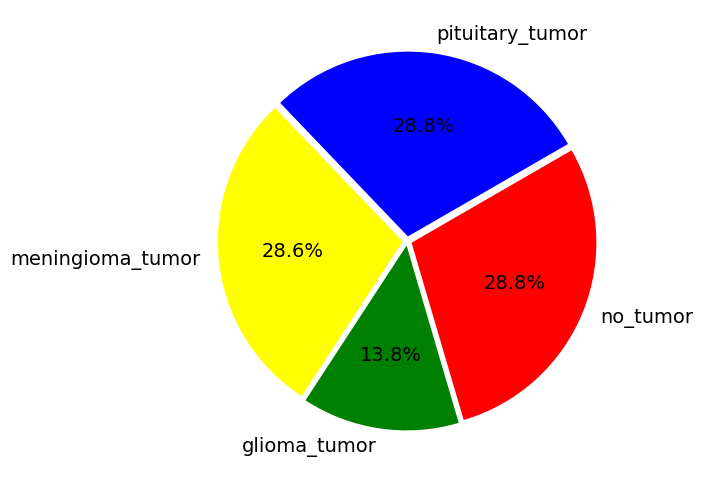

In [5]:
plt.figure(figsize=(14,6))

colors = ['blue', 'yellow', 'green', 'red']
plt.rcParams.update({'font.size': 14})

plt.pie([len([x for x in train_labels if x=='pituitary_tumor']),
         len([x for x in train_labels if x=='meningioma_tumor']),
         len([x for x in train_labels if x=='no_tumor']),
         len([x for x in train_labels if x=='glioma_tumor'])],

        labels=['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor'],

        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

In [6]:
test_dir = 'Dataset\Testing'
test_paths = []
test_labels = []

# Iterate over each directory in train_dir
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    # Check if it's a directory
    if os.path.isdir(label_path):
        # Iterate over each image file in the label directory
        for image in os.listdir(label_path):
            image_path = os.path.join(label_path, image)
            test_paths.append(image_path)
            test_labels.append(label)

# Shuffle the train_paths and train_labels in sync
test_paths, test_labels = shuffle(test_paths, test_labels)

In [7]:
print(test_labels[:5])

['meningioma_tumor', 'glioma_tumor', 'glioma_tumor', 'no_tumor', 'glioma_tumor']


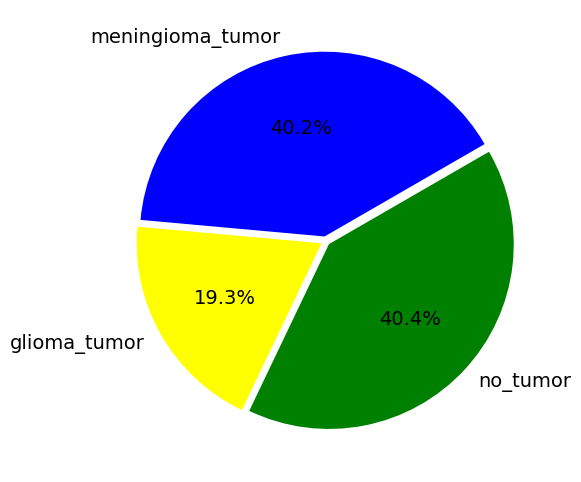

In [8]:
plt.figure(figsize=(14,6))

colors = ['blue', 'yellow', 'green']
plt.rcParams.update({'font.size': 14})

plt.pie([
         len([x for x in train_labels if x=='meningioma_tumor']),
         len([x for x in train_labels if x=='no_tumor']),
         len([x for x in train_labels if x=='glioma_tumor'])],

        labels=['meningioma_tumor', 'glioma_tumor', 'no_tumor'],

        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025),
        startangle=30);

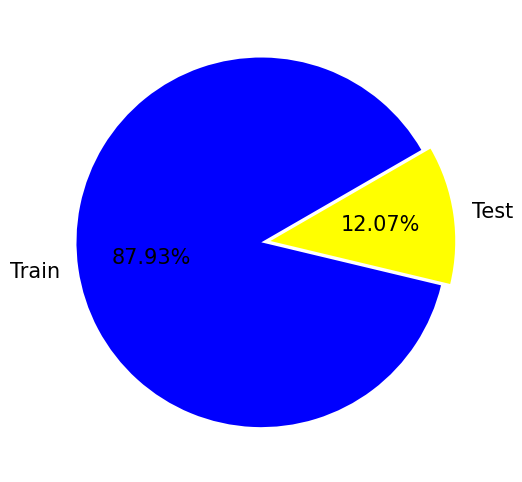

In [9]:
plt.figure(figsize=(14,6))
colors = ['blue', 'yellow', 'green', 'red']
plt.rcParams.update({'font.size': 15})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.2f%%', explode=(0.05,0),
        startangle=30);

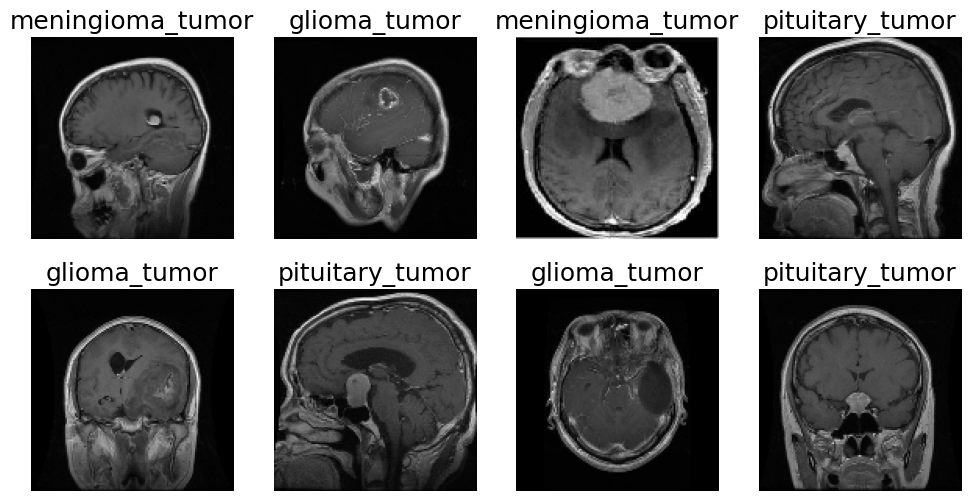

In [10]:
def augment_image(image):
    # Dummy augmentation function, replace with actual augmentations if needed
    # Here we're just converting image to array and normalizing it
    return img_to_array(image) / 255.0

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Load a subset of images and their labels
images = open_images(train_paths[50:59])
labels = train_labels[50:59]

# Plot the images with their labels
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x-1])  # Corrected index to avoid IndexError
    plt.imshow(images[x-1])
plt.rcParams.update({'font.size': 12})
plt.show()

In [11]:
from PIL import Image

In [12]:
# Convert labels to integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    open_images(train_paths), train_labels_encoded, test_size=0.2, random_state=42)

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(130, 130, 3)))

model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

C:\Users\Monisha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,957,930 (15.10 MB)

 Trainable params: 3,957,930 (15.10 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test))

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 28s 363ms/step - loss: 1.3551 - sparse_categorical_accuracy: 0.4372 - val_loss: 0.8873 - val_sparse_categorical_accuracy: 0.6289
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 28s 388ms/step - loss: 0.8181 - sparse_categorical_accuracy: 0.6752 - val_loss: 0.7735 - val_sparse_categorical_accuracy: 0.6829
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 413ms/step - loss: 0.6744 - sparse_categorical_accuracy: 0.7290 - val_loss: 0.6851 - val_sparse_categorical_accuracy: 0.7526
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 395ms/step - loss: 0.5645 - sparse_categorical_accuracy: 0.7856 - val_loss: 0.5784 - val_sparse_categorical_accuracy: 0.7927
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 344ms/step - loss: 0.4626 - sparse_categorical_accuracy: 0.8383 - val_loss: 0.5332 - val_sparse_categorical_accuracy: 0.8101


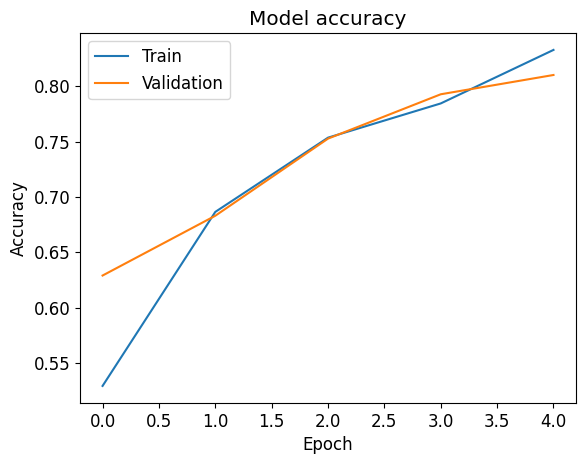

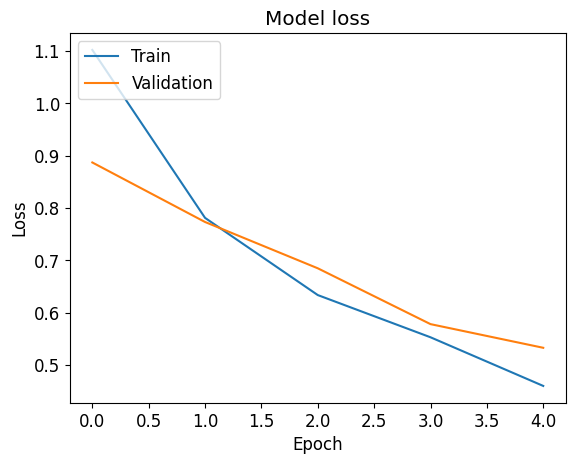

In [17]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.5126 - sparse_categorical_accuracy: 0.8249
Test accuracy: 0.8101045489311218


In [19]:
pred = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


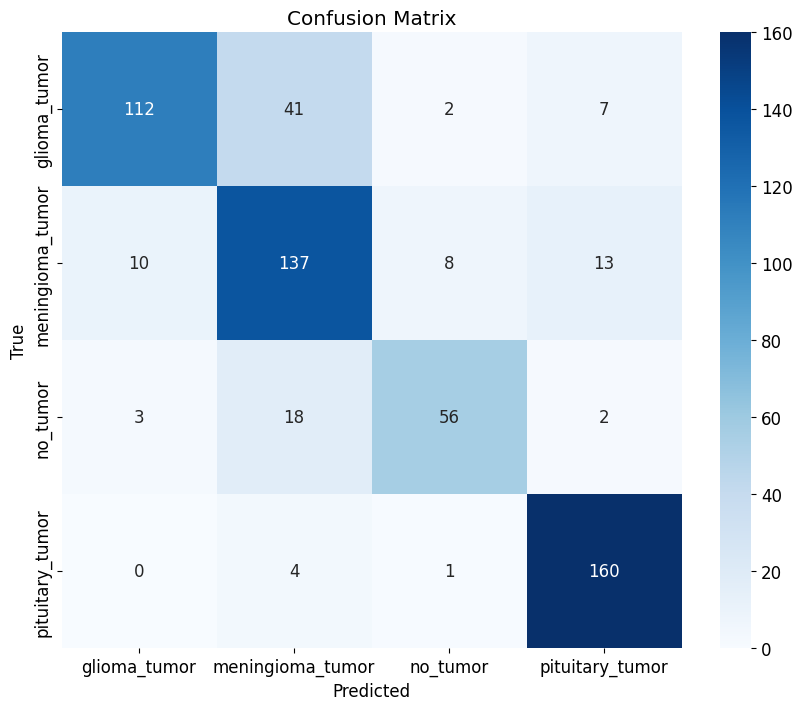

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(model.predict(x_test), axis=1), target_names=label_encoder.classes_))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.69      0.78       162
meningioma_tumor       0.69      0.82      0.74       168
        no_tumor       0.84      0.71      0.77        79
 pituitary_tumor       0.88      0.97      0.92       165

        accuracy                           0.81       574
       macro avg       0.82      0.80      0.80       574
    weighted avg       0.82      0.81      0.81       574

